<a href="https://colab.research.google.com/github/NguyenHoangThai1808/PortfolioProjects/blob/main/D%E1%BB%B1_%C4%91o%C3%A1n_ti%E1%BB%83u_%C4%91%C6%B0%E1%BB%9Dng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thuật toán phân loại Naive Bayes Classifier


In [ ]:
#import thư viện
import numpy as np, pandas as pd
import matplotlib.pyplot as plt #Thư viện cho vẽ hình
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120}) #Cài đặt kích thước cho toàn bộ các hình trong file notebook này giống nhau

In [ ]:
#Link data 
link='https://drive.google.com/file/d/1j9jLWtHsyKY3heKIy_q9R1LDnVgqol0p/view?usp=sharing'

Dự đoán tiểu đường

In [ ]:
#Đọc data 
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path,encoding= 'unicode_escape')

```
Mô tả dữ liệu 768 rows × 9 columns :
1.Number of times pregnant
2.Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3.Diastolic blood pressure (mm Hg)
4.Triceps skin fold thickness (mm)
5.2-Hour serum insulin (mu U/ml)
6.Body mass index (weight in kg/(height in m)^2)
7.Diabetes pedigree function
8.Age (years)
9.Class variable (0 or 1)
```



In [ ]:
#Xem thông tin cơ bản của dữ liệu
df.head()
#df.info()
#df.describe()

,Times_Pregnant,Glucose_Concentration,Blood_Pressure,Skin_thickness,insulin,BMI,DPF,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = df["Class"].values #lấy y data là cột cuối cùng 
#X = df.iloc[:, :-1].values #lấy X data từ cột 1 tới cột 8
X=df.iloc[:, 1:3].values

In [ ]:
X

array([ 6,  1,  8, ..., 23,  0, 31])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB() #Gán mô hình từ thư viện vào biến GNB
GNB.fit(X_train, y_train) # Training mô hình
y_pred=GNB.predict(X_test) #Dự báo

In [ ]:
#y_pred

In [ ]:
#y_test

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) #Tính độ chính xác của mô hình


0.7445887445887446

In [ ]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[129,  20],
       [ 39,  43]])

Text(0.5, 8.666666666666668, 'Dự báo')

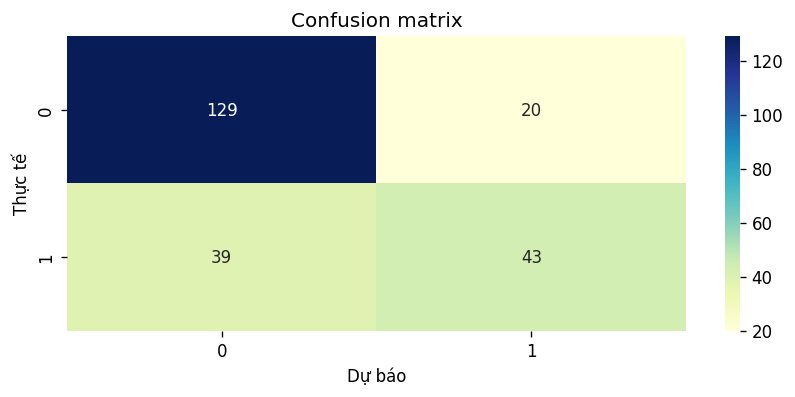

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [ ]:
#Tính bằng phương pháp Logistic Regression 
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(X_train,y_train)
y_pred_logis=logis.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy_score(y_test, y_pred_logis) # Độ chính xác của LR tốt hơn GNB

0.7229437229437229

Text(0.5, 8.666666666666668, 'Dự báo')

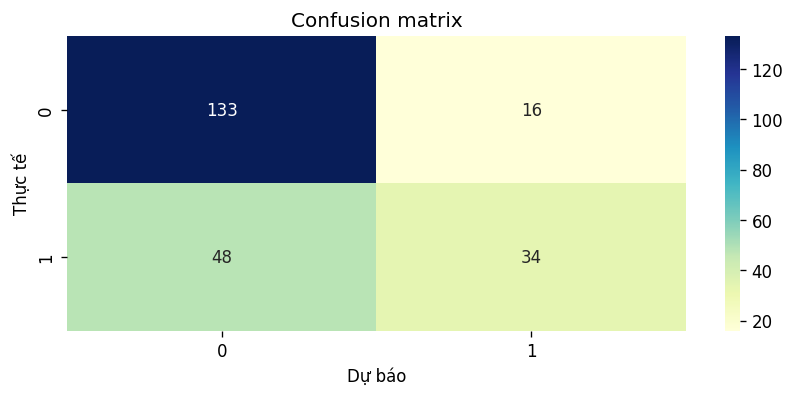

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logis)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')